In [6]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [7]:
data = pd.read_csv("WELFake_Dataset.csv")  

Dataset from https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

<br>Dataset contains four columns: </br>
Serial number (starting from 0);
Title (about the text news heading);
Text (about the news content);
and Label (0 = fake and 1 = real).

In [8]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [10]:
data.isna().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [11]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71537 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  71537 non-null  int64 
 1   title       71537 non-null  object
 2   text        71537 non-null  object
 3   label       71537 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


In [12]:
data.duplicated().sum()

0

In [13]:
import seaborn as sns

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

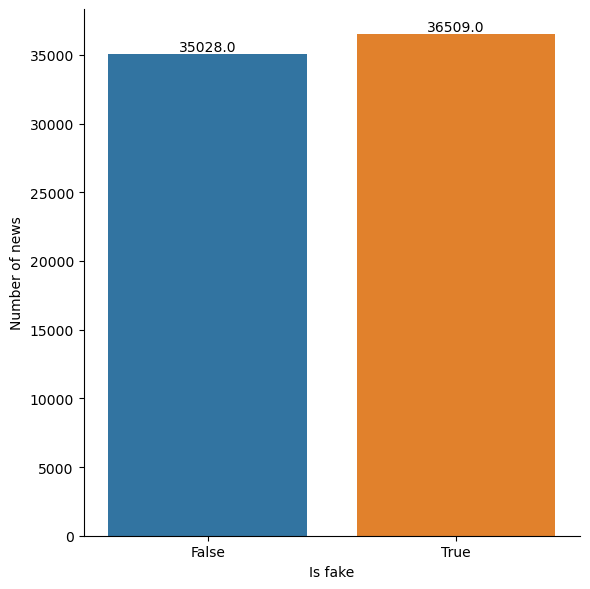

In [15]:
g = sns.catplot(x="label", kind='count', order=[0, 1], data=data, height=6, aspect=1)
g.set(xlabel='Is fake', ylabel='Number of news')
g.set_xticklabels(labels=['False', 'True'])
ax = g.facet_axis(0, 0)

for c in ax.containers:
    labels = [(v.get_height()) for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.tight_layout()
plt.show()

The dataset is balanced between the number of fake and true news. Even if there is a larger presence of fake news, real news are not under represented thus preventing a bias of class for the model.

In [16]:
data = data.drop(["Unnamed: 0"], axis = 1)

In [17]:
data.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [18]:
data['content'] = data.title + data.text

In [19]:
data = data.drop(['title', 'text'], axis = 1)

In [20]:
data.head()

,label,content
0,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2,1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,1,SATAN 2: Russia unvelis an image of its terrif...
5,1,About Time! Christian Group Sues Amazon and SP...


In [21]:
from nltk.tokenize import RegexpTokenizer 

stop_words = set(stopwords.words('english'))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

data_copy = data.copy()

data_copy['content'] = data_copy['content'].apply(lambda x: ' '.join([word for word in tokenizer.tokenize(x) if not word in stop_words]))

In [22]:
data_copy.head()

,label,content
0,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2,1,UNBELIEVABLE OBAMA S ATTORNEY GENERAL SAYS MOS...
3,0,Bobby Jindal raised Hindu uses story Christian...
4,1,SATAN 2 Russia unvelis image terrifying new SU...
5,1,About Time Christian Group Sues Amazon SPLC De...


In [23]:
X = data_copy.loc[:, 'content']
y = data_copy.loc[:, 'label']
X2 = data.loc[:, 'content']

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
tok = CountVectorizer().fit_transform(X)
tok_stopw = CountVectorizer().fit_transform(X2)

In [25]:
def eval(text, cm, creport, accuracy):
        print(text)
        print('Classification report: \n', creport)
        print('Accuracy: ', accuracy)
        print('\n\n')
        plt.figure(figsize = (8,6))
        sns.heatmap(cm, annot=True)
        plt.title(text, fontsize =20)
    

# Naive Bayes model with and without stopwords

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Bayes with stopwords
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      6974
           1       0.90      0.89      0.90      7334

    accuracy                           0.90     14308
   macro avg       0.90      0.90      0.90     14308
weighted avg       0.90      0.90      0.90     14308

Accuracy:  0.8952334358400894



Bayes without stopwords
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      6974
           1       0.91      0.90      0.91      7334

    accuracy                           0.90     14308
   macro avg       0.90      0.90      0.90     14308
weighted avg       0.90      0.90      0.90     14308

Accuracy:  0.9037601341906626



Training records: 57229 | Testing records: 14308


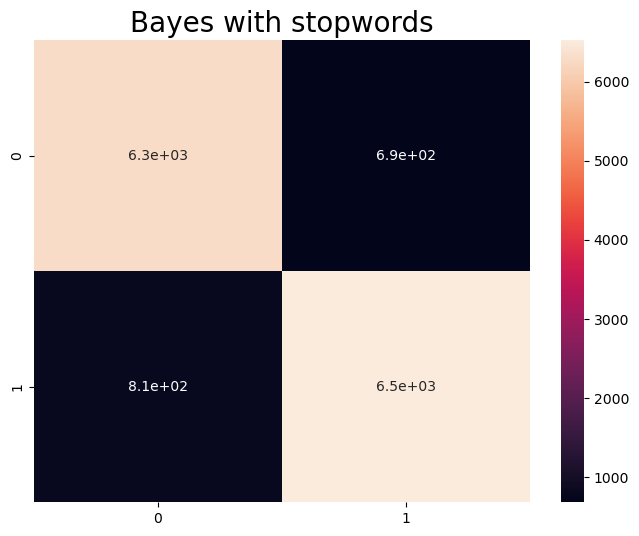

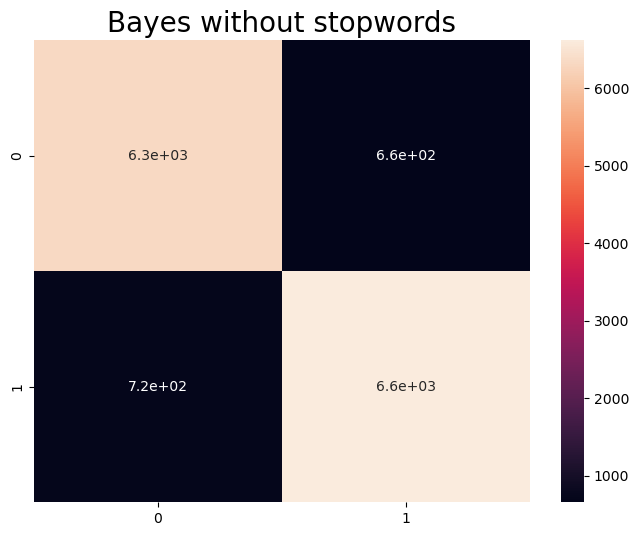

In [27]:
for i, df in enumerate([tok_stopw, tok]):
    X = df
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 12)
    model_bayes = MultinomialNB().fit(X_train, y_train)
    pred = model_bayes.predict(X_test)
          
    if i == 0:
        cm_bayes = confusion_matrix(y_test, pred)
        acc = accuracy_score(y_test, pred)
        creport = classification_report(y_test, pred)
        text = "Bayes with stopwords"
    
        eval(text, cm_bayes, creport, acc)
    if i == 1:
        cm_bayes = confusion_matrix(y_test, pred)
        acc = accuracy_score(y_test, pred)
        creport = classification_report(y_test, pred)
        text = "Bayes without stopwords"
        eval(text, cm_bayes, creport, acc)

print(f"Training records: {X_train.shape[0]} | Testing records: {X_test.shape[0]}")

# Linear regression model without stopwords

In [28]:
X = data_copy.loc[:, 'content']
y = data_copy.loc[:, 'label']

tok2 = CountVectorizer().fit_transform(X)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

In [29]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 10000)
LR.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [30]:
pred2 = LR.predict(X_test)

Linear regression
Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      6974
           1       0.96      0.98      0.97      7334

    accuracy                           0.97     14308
   macro avg       0.97      0.97      0.97     14308
weighted avg       0.97      0.97      0.97     14308

Accuracy:  0.9688985183114341





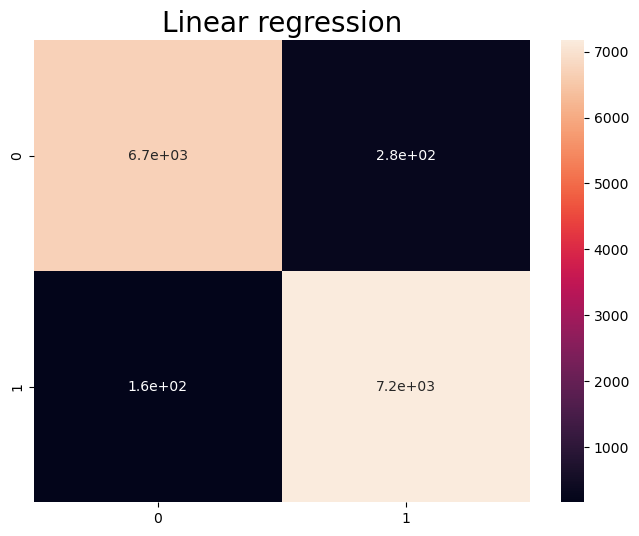

In [31]:
cm2 = confusion_matrix(y_test, pred2)
acc2 = accuracy_score(y_test, pred2)
creport2 = classification_report(y_test, pred2)
text2 = "Linear regression"

eval(text2, cm2, creport2, acc2)


# Bidirectional LTSM model

In [32]:
import tensorflow as tf
from tensorflow import keras as kr
from tqdm.keras import TqdmCallback
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [33]:
X = data_copy.loc[:, 'content']
y = data_copy.loc[:, 'label']

In [34]:
vocab_size = 10000
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

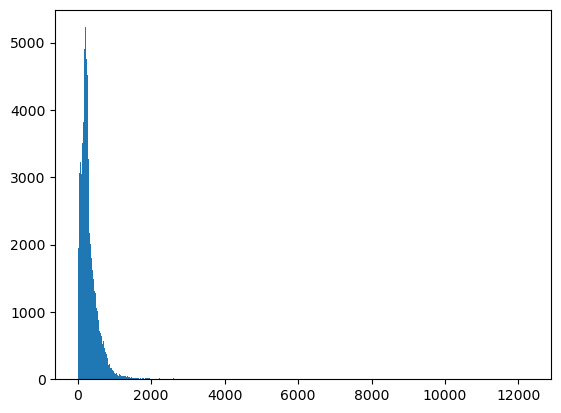

In [35]:
plt.hist([len(x) for x in X], bins=500)
plt.show()

In [36]:
max_seq_len = 512

X = pad_sequences(X, maxlen=max_seq_len)

In [37]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [38]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(name='inputs',shape=[max_seq_len]),
    tf.keras.layers.Embedding(vocab_size, 128, input_length=max_seq_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 512, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 512, 256)         263168    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [40]:
from keras.callbacks import EarlyStopping

history = model2.fit(X_train3, y_train3, epochs=10, validation_data=(X_test3, y_test3), batch_size = 64, callbacks=[EarlyStopping(monitor='val_loss', patience=2, verbose=False,restore_best_weights=True)])

Epoch 1/10
895/895 [==============================] - 1173s 1s/step - loss: 0.2155 - accuracy: 0.9177 - val_loss: 0.1466 - val_accuracy: 0.9489
Epoch 2/10
895/895 [==============================] - 1064s 1s/step - loss: 0.1455 - accuracy: 0.9470 - val_loss: 0.1291 - val_accuracy: 0.9468
Epoch 3/10
895/895 [==============================] - 1443s 2s/step - loss: 0.0577 - accuracy: 0.9810 - val_loss: 0.0844 - val_accuracy: 0.9734
Epoch 4/10
895/895 [==============================] - 1110s 1s/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0964 - val_accuracy: 0.9727
Epoch 5/10
895/895 [==============================] - 1113s 1s/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.1069 - val_accuracy: 0.9755


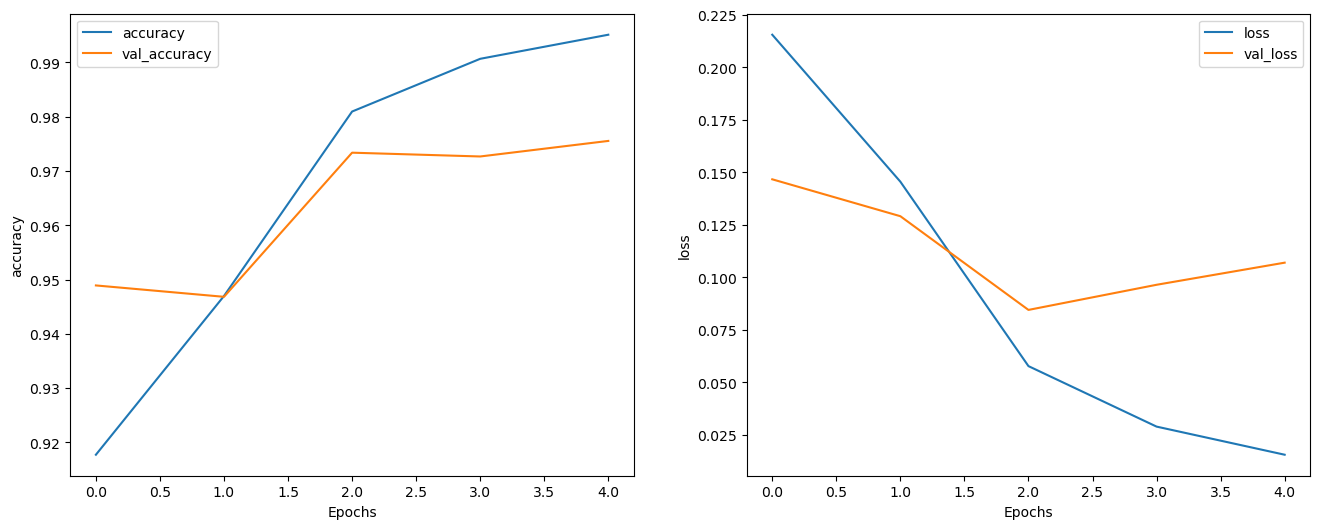

In [41]:
def plot_graphs(history, metric):
    
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

In [44]:
pred3 = model2.predict(X_test3)>0.5

448/448 [==============================] - 89s 198ms/step


BI LTSM
Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      6974
           1       0.97      0.98      0.97      7334

    accuracy                           0.97     14308
   macro avg       0.97      0.97      0.97     14308
weighted avg       0.97      0.97      0.97     14308

Accuracy:  0.9733715403969807





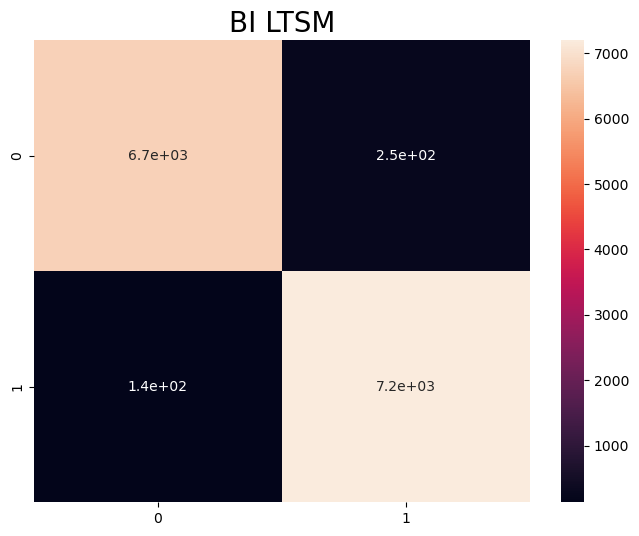

In [47]:
cm3 = confusion_matrix(y_test3, pred3)
acc3 = accuracy_score(y_test3, pred3)
creport3 = classification_report(y_test3, pred3)
text3 = "BI LTSM"

eval(text3, cm3, creport3, acc3)